لنقارن تضمينات الكلمات بين عدد من المدونات المختلفة من خلال تمثيل العلاقات بين الكلمات بيانيا.

ولنجهز بيئة العمل.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


Done!


سنرفع تضمينات الكلمات المدربة مسبقا. وهنا نستعمل تضمين الكلمات بدون وسوم أقسام الكلام. فإذا أردت أن *تعتمد* في ذلك على نفسك، فدونك الكود البرمجي معلقا. ويمكنك الاطلاع على تفاصيل أكثر في حزمة *text_analytics*.

In [2]:
file = os.path.join(ai.data_dir, "economic.nyt.1931-2016.gz")
nyt_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
nyt_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(nyt_word_vectors)
print(list(nyt_word_vectors_vocab.keys())[0:20])

[[-0.06299999  0.07947273  0.0401363  ... -0.03059959 -0.00951996
  -0.06459376]
 [-0.04394805  0.06427792  0.11873838 ...  0.03227458  0.09852331
  -0.02534213]
 [-0.00149538  0.16307357  0.16590007 ... -0.0593612   0.09060597
  -0.01625741]
 ...
 [-0.19475771  0.09054728  0.25081506 ... -0.04206347 -0.09087317
   0.01764593]
 [-0.02526552 -0.06752995  0.0294262  ... -0.01645222 -0.03179419
   0.03135042]
 [-0.07107804 -0.03533437 -0.0161457  ...  0.01807991 -0.02053553
   0.07141624]]
['the', 'of', 'a', 'and', 'to', 'in', 'number', 'for', 'that', 'on', 'at', 'is', 'by', 'was', 'with', 'as', 'new', 'his', 'from', 'it']


لقد رفعنا التضمينات الخاصة بالمفردات الآن. وقد دربت تلك التضمينات على المقالات الافتتاحية في صحيفة *نيويورك تايمز* من 1931 إلى 2016. فلنقارن الآن بين تلك التضمينات.

In [3]:
file = os.path.join(ai.data_dir, "economic.congress.1931-2016.gz")
congress_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
congress_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(congress_word_vectors)
print(list(congress_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "sociolinguistics.english_all.gz")
socio_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
socio_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(socio_word_vectors)
print(list(socio_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "stylistics.gutenberg_all.gz")
pg_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
pg_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(pg_word_vectors)
print(list(pg_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "economic.hotel_reviews.gz")
hotel_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
hotel_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(hotel_word_vectors)
print(list(hotel_word_vectors_vocab.keys())[0:20])

[[ 0.12996759 -0.04119075  0.11625136 ...  0.1024373  -0.07774138
  -0.09594914]
 [ 0.16631457 -0.0064401   0.21851963 ...  0.04153391 -0.06634763
  -0.06577659]
 [ 0.28316206  0.0799558   0.10569964 ... -0.0495805  -0.15108101
  -0.14238696]
 ...
 [ 0.02350432  0.00554276  0.20351361 ... -0.2508781   0.10376185
  -0.0089024 ]
 [ 0.04374084  0.06962304 -0.06937325 ...  0.16237937  0.07453305
   0.02180615]
 [ 0.01508431 -0.00148335  0.12770014 ...  0.00640929  0.06754814
   0.02095785]]
['the', 'of', 'to', 'and', 'in', 'that', 'a', 'i', 'is', 'number', 'this', 'for', 'it', 'we', 'be', 'have', 'on', 'not', 'as', 'are']
[[ 0.02562547 -0.12505892 -0.0611533  ... -0.10608659  0.00328061
   0.0689163 ]
 [ 0.0982582  -0.05569987 -0.0137266  ... -0.14571962  0.04492021
   0.0499051 ]
 [ 0.02195907 -0.16132937 -0.04240015 ... -0.13090234  0.00615026
   0.09521095]
 ...
 [ 0.04141416 -0.05513437  0.01968002 ... -0.11194862  0.11899749
   0.01177979]
 [-0.014961   -0.0834965  -0.13771939 ... -0.

لنكتب دالة تختار كلمة عشوائيا بشرط وجودها في كل قواعد البيانات.

In [4]:
nyt_words = list(nyt_word_vectors_vocab.keys())
congress_words = list(congress_word_vectors_vocab.keys())
socio_words = list(socio_word_vectors_vocab.keys())
pg_words = list(pg_word_vectors_vocab.keys())
hotel_words = list(hotel_word_vectors_vocab.keys())

import random

def get_word():
    
    while True:
        sample = random.choice(nyt_words)
        if sample in congress_words:
            if sample in socio_words:
                if sample in pg_words:
                    if sample in hotel_words:
                        return sample
    
print(get_word())

tyrell


سنمثل الآن تلك التضمينات بيانيا باستعمال (تحليل المكونات الرئيسية PCA) أولا؛ وذلك لتقليل أبعاد تضمينات الكلمات المائة إلى بعدين نستعملهما لـ *x* و*y*.

In [5]:
from sklearn.decomposition import PCA

print(nyt_word_vectors.shape)
nyt_pca = PCA(n_components=2)
nyt_word_vectors2 = nyt_pca.fit_transform(nyt_word_vectors)
print(nyt_word_vectors2.shape)

(207661, 100)
(207661, 2)


وهكذا، لنقم الآن بإجراء نفس عملية التحويل لكل مجموعة من التضمينات.

In [6]:
print(congress_word_vectors.shape)
congress_pca = PCA(n_components=2)
congress_word_vectors2 = congress_pca.fit_transform(congress_word_vectors)
print(congress_word_vectors2.shape)

print(socio_word_vectors.shape)
socio_pca = PCA(n_components=2)
socio_word_vectors2 = socio_pca.fit_transform(socio_word_vectors)
print(socio_word_vectors2.shape)

print(pg_word_vectors.shape)
pg_pca = PCA(n_components=2)
pg_word_vectors2 = pg_pca.fit_transform(pg_word_vectors)
print(pg_word_vectors2.shape)

(165460, 100)
(165460, 2)
(408283, 100)
(408283, 2)
(234865, 100)
(234865, 2)


والان نختار عددا من الكلمات الموجودة في كل قواعد البيانات.

In [7]:
words = []
nyt_indexes = []
congress_indexes = []
pg_indexes = []
socio_indexes = []

#Get random words
#for i in range(15):
#    word = get_word()
#    print(word)
#    words.append(word)

#Use pre-defined words
words = ['american','national','law','public','tax','war','foreign','security','military','energy']
for word in words:
    nyt_indexes.append(nyt_word_vectors_vocab[word])
    congress_indexes.append(congress_word_vectors_vocab[word])
    pg_indexes.append(pg_word_vectors_vocab[word])
    socio_indexes.append(socio_word_vectors_vocab[word])

ثم نرسم رسما بيانيا.

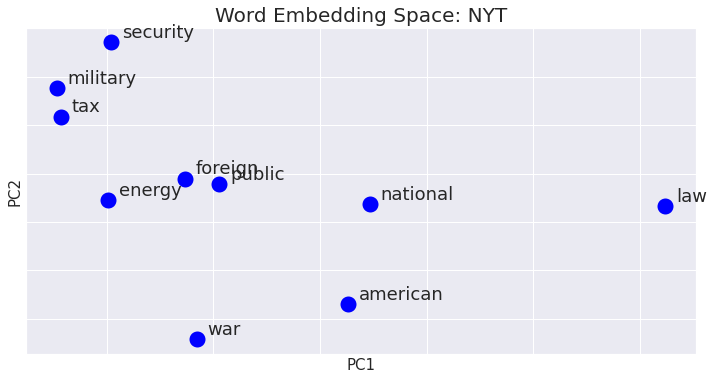

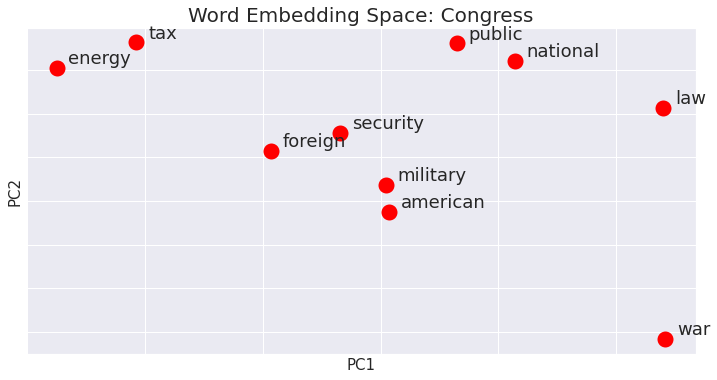

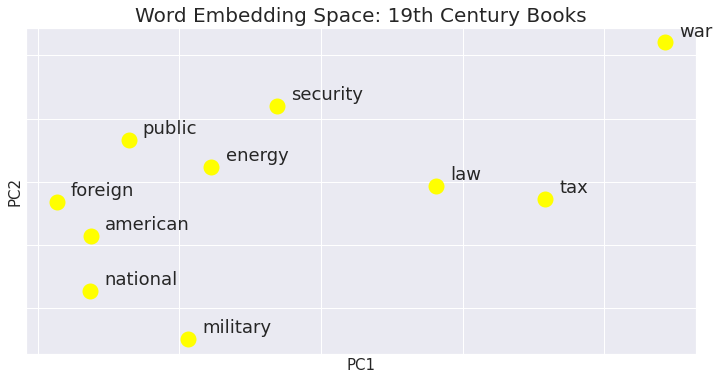

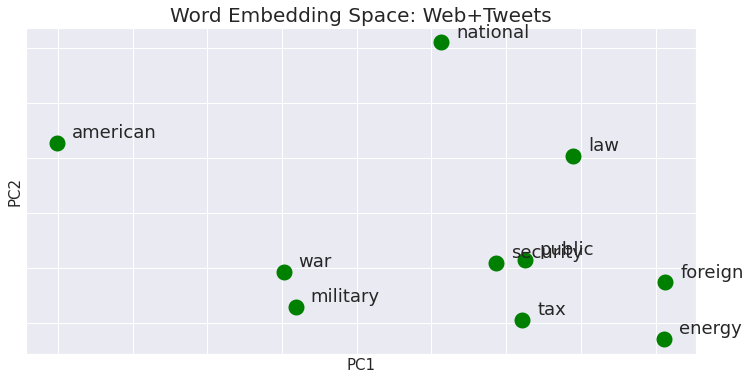

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
adjust = 0.005

#NYT
plt.figure(figsize=(12,6))
plt.scatter(nyt_word_vectors2[nyt_indexes,0],nyt_word_vectors2[nyt_indexes,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: NYT",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(nyt_word_vectors2[nyt_indexes[i],0]+adjust,nyt_word_vectors2[nyt_indexes[i],1]+adjust))
    
#Congress
plt.figure(figsize=(12,6))
plt.scatter(congress_word_vectors2[congress_indexes,0],congress_word_vectors2[congress_indexes,1],linewidths=10,color='red')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: Congress",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(congress_word_vectors2[congress_indexes[i],0]+adjust,congress_word_vectors2[congress_indexes[i],1]+adjust))
    
#PG
plt.figure(figsize=(12,6))
plt.scatter(pg_word_vectors2[pg_indexes,0],pg_word_vectors2[pg_indexes,1],linewidths=10,color='yellow')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: 19th Century Books",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(pg_word_vectors2[pg_indexes[i],0]+adjust,pg_word_vectors2[pg_indexes[i],1]+adjust))
    
#Socio
plt.figure(figsize=(12,6))
plt.scatter(socio_word_vectors2[socio_indexes,0],socio_word_vectors2[socio_indexes,1],linewidths=10,color='green')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: Web+Tweets",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(socio_word_vectors2[socio_indexes[i],0]+adjust,socio_word_vectors2[socio_indexes[i],1]+adjust))

وإذا ما استكشفنا مجموعات عشوائية متنوعة من الكلمات من خلال تلك التضمينات، ندرك أن العلاقات المختزلة في بعدين ليست في الواقع علاقات دالة. لأنها تختلف كثيرا بين المدونات. رغم أننا قد قلصنا التمثيلات ذات الأبعاد المئة إلى بعدين فقط. فلنجرب منهجية مختلفة.



سنأخذ هذه المرة 50 كلمة عشوائية تتشاركها كل قواعد البيانات. وسنوجد لكل كلمة أقرب 50 كلمة لها في فضاء تضمين الكلمات الخاص بها. ومن ثم سنقيس التداخل بين كل زوج من المدونات. فإذا كانت مدونتي نيويورك تايمز والكونقرس تتشاركان أكثر الكلمات تشابها، سيكون بينهما تداخل عال. وذلكم تقييم مشابه لما ورد أعلاه، إلا أنه لا يتطلب منا معالجة عدد كبير من الأمثلة رسوميا، ولا يقلص من البعدية. كما يتضمن المزيد من الكلمات فلا تبني النتائج على بعض الأمثلة العشوائية.


In [9]:
nyt_closest = []
congress_closest = []
pg_closest = []
socio_closest = []
hotel_closest = []

n_closest = 5
i = 1
top_words = ['american', 'act', 'me', 'make', 'speaker', 'say', 'over', 'into', 'legislation', 'gentleman'] #,'also', 'before', 'could', 'today', 'going', 'know', 'national', 'just', 'percent', 'law', 'want', 'must', 'great', 'public', 'here', 'first', 'most', 'support', 'million', 'like', 'members', 'believe', 'take', 'does', 'said', 'work', 'get', 'last', 'well', 'then', 'way', 'fact', 'world', 'tax', 'war', 'vote', 'much', 'need', 'every', 'money', 'being', 'where', 'through', 'did', 'department', 'go', 'ask', 'point', 'even', 'right', 'him', 'after', 'upon', 'important', 'service', 'same', 'budget', 'against', 'how', 'administration', 'good', 'two', 'let', 'question', 'report', 'part', 'come', 'record', 'without', 'nation', 'during', 'system', 'both', 'matter', 'own', 'business', 'order', 'resolution', 'present', 'health', 'provide', 'programs', 'shall', 'back', 'hope', 'power', 'use', 'foreign', 'billion', 'pay', 'general', 'colleagues', 'see', 'policy', 'give', 'action', 'nations', 'cost', 'since', 'while', 'whether', 'done', 'however', 'might', 'secretary', 'economic', 'problem', 'distinguished', 'why', 'member', 'increase', 'long', 'security', 'defense', 'another', 'military', 'down', 'funds', 'day', 'interest', 'put', 'america', 'care', 'issue', 'again', 'between', 'able', 'section', 'help', 'further', 'case', 'each', 'court', 'men', 'senators', 'education', 'floor', 'industry', 'consent', 'district', 'necessary', 'course', 'small', 'rights', 'situation', 'energy', 'conference', 'office', 'passed', 'unanimous', 'yield', 'opportunity', 'few', 'far', 'development', 'amount', 'commission', 'too', 'ago', 'man', 'control', 'thank', 'area', 'services', 'within', 'problems', 'find', 'americans', 'given', 'future', 'york', 'continue', 'labor', 'little', 'consideration', 'already', 'used', 'statement', 'children', 'certain', 'place', 'washington', 'authority', 'proposed', 'still', 'better', 'amendments', 'debate', 'purpose', 'local',]

for word in top_words:

    print(i, word)
    i += 1
    
    #NYT
    target, top50 = ai.linguistic_distance(x=nyt_word_vectors, y=nyt_words, sample=nyt_word_vectors_vocab[word], n=n_closest, metric="cosine")
    nyt_closest.append(top50)
    
    #Congress
    target, top50 = ai.linguistic_distance(x=congress_word_vectors, y=congress_words, sample=congress_word_vectors_vocab[word], n=n_closest, metric="cosine")
    congress_closest.append(top50)
    
    #Socio
    target, top50 = ai.linguistic_distance(x=socio_word_vectors, y=socio_words, sample=socio_word_vectors_vocab[word], n=n_closest, metric="cosine")
    socio_closest.append(top50)
    
    #PG
    target, top50 = ai.linguistic_distance(x=pg_word_vectors, y=pg_words, sample=pg_word_vectors_vocab[word], n=n_closest, metric="cosine")
    pg_closest.append(top50)
    
    #Hotels
    target, top50 = ai.linguistic_distance(x=hotel_word_vectors, y=hotel_words, sample=hotel_word_vectors_vocab[word], n=n_closest, metric="cosine")
    hotel_closest.append(top50)

1 american
2 act
3 me
4 make
5 speaker
6 say
7 over
8 into
9 legislation
10 gentleman


والآن نعين دالة لحساب المسافة بين مجموعتين من الكلمات.

In [10]:
from scipy.spatial.distance import jaccard

def get_jaccard(words1, words2):
    
    #Get the whole vocabulary
    vocab = list(set(words1+words2))
    
    #Convert each word list to a boolean vector
    words1 = [1 if x in words1 else 0 for x in vocab]
    words2 = [1 if x in words2 else 0 for x in vocab]
    
    return 1 - jaccard(words1, words2)

ولنستعمل الآن هذه الدالة للوصول إلى متوسط المسافة بين التضمينات من كل مدونة.

In [11]:
import statistics

def get_embedding_distance(closest1, closest2):
    
    results = []
    
    for i in range(len(closest1)):
        results.append(get_jaccard(closest1[i], closest2[i]))

    return statistics.mean(results)
        

In [12]:
all_values = []

for m in [nyt_closest, congress_closest, pg_closest, socio_closest, hotel_closest]:
    row_values = []
    
    for n in [nyt_closest, congress_closest, pg_closest, socio_closest, hotel_closest]:
        row_values.append(get_embedding_distance(m, n))
        
    all_values.append(row_values)

df = pd.DataFrame(all_values)
df.columns=["NYT", "Congress", "Books", "Digital", "Hotels"]
df.index=["NYT", "Congress", "Books", "Digital", "Hotels"]
print(df)

               NYT  Congress     Books   Digital    Hotels
NYT       1.000000  0.112302  0.112302  0.101190  0.058333
Congress  0.112302  1.000000  0.174603  0.227778  0.096825
Books     0.112302  0.174603  1.000000  0.249603  0.126190
Digital   0.101190  0.227778  0.249603  1.000000  0.157937
Hotels    0.058333  0.096825  0.126190  0.157937  1.000000


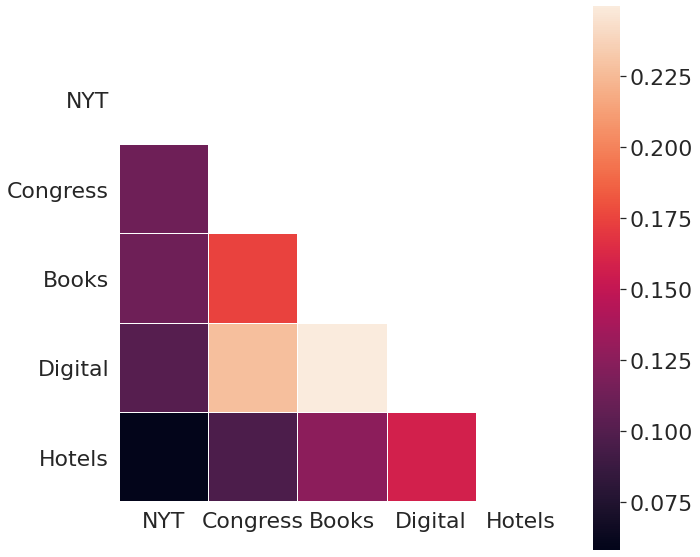

In [14]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(df, mask=mask, square=True, linewidths=1)
    
sns.set(font_scale=2)